# Sessió 10: Regressió Lineal

L'objectiu, i diferència respecte el perceptró, d'aquest model és dur a terme un *regression analysis*, és a dir, enlloc de classificar les dades entre dues o més classes predim un valor continu. Els models de regressió s'empren per prediure variables objectius a una escala contínua.

El model **regressió lineal** és el model més simple per fer regressió. Hi ha dos tipus de regressió linal: la simple i la multiple. La regressió lineal simple només accepta una variable independent.

$$\hat{y}=w_{0} + w_{1}x_1$$

On $w_{0}$ és el biax o intercept i $w_1$ és el coefficient de la variable independent.

Gràficament aquest model és pot visualitzar de la següent manera:

![proces](regression.png)

Per models de regressió lineal multiple la equació prèvia es modifica de la següent manera:

$$\hat{y}=w_{0} + w_{1}x_1 + w_{2}x_2 + ... + w_{n}x_n$$

Aquestes assumpcions són conegudes com les Gauss-Markov.

## Aprenentatge automàtic

Hem de seguir el mateix procès que varem veure la setmana passada:

1. Tractament de les dades.
2. Entrenament.
3. Anàlisis dels resultats.

Per fer-ho el primer que hem de fer es importar les llibreries. 

In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

Posteriorment crearem unes dades amb les que fer feina.

In [2]:
X, y = make_regression(n_samples=400, n_features=1, n_informative=1, noise=50.0, random_state=42)

Una vegada tenim les dades miram com són les dades.

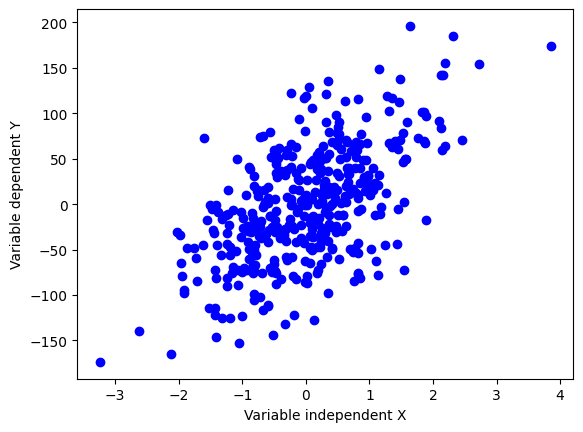

In [3]:
plt.scatter(X, y, color="blue") # dibujamos la nube de puntos
plt.xlabel('Variable independent X')
plt.ylabel('Variable dependent Y')
plt.show()

Crearem un model de regressió lineal per poder fer una predicció sobre les dades. És molt important el paràmetre de ``fit_intercept``. 

In [4]:
regr = LinearRegression(fit_intercept=True)

Una vegada creat l'objecte l'entrenam amb les dades que hem generat. Primer però hem de separar les dades en train i test.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Ara sí que podem entrenar el model amb les dades d'entrenament. 

In [6]:
regr.fit(X_train, y_train);

El resultat de l'entrenament és que ara el model té un biaix i un pes per cada *feature*.

In [7]:
regr.intercept_

-2.2869407457128923

In [8]:
regr.coef_

array([38.04357551])

### Estimam el valors

Una vegada tenim el model entrenat podem fer prediccions. Aquestes prediccions són amb la formula ja coneguda de la regressió lineal. Per desmotrar-ho mostrarem el valor de fer la predicció i de fer les operacions de dos punts.

In [9]:
punts_simples = np.array([1,2]).reshape((-1,1))
print((regr.predict(punts_simples), [regr.coef_ * 1 + regr.intercept_, regr.coef_ * 2 + regr.intercept_]))

(array([35.75663476, 73.80021027]), [array([35.75663476]), array([73.80021027])])


Anem a mostrar la preddició del test.

In [10]:
y_pred = regr.predict(X_test)

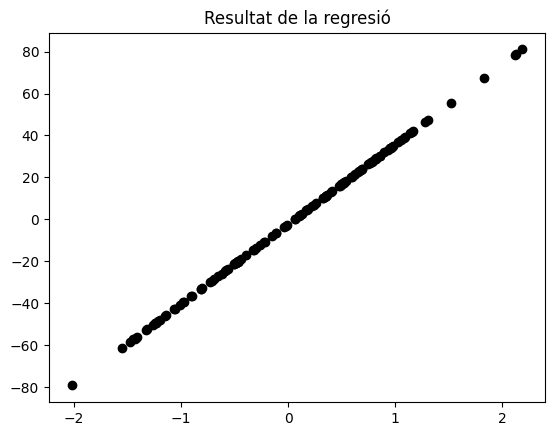

In [11]:
plt.scatter(X_test, y_pred, color="black")
plt.title("Resultat de la regresió")
plt.show()

Comparam les dades original amb el model estimat.

In [12]:
punts = [regr.coef_ * -2.5 + regr.intercept_, regr.coef_ * 2.5 + regr.intercept_]

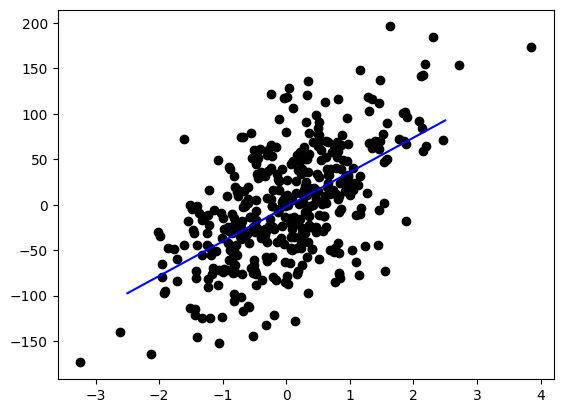

In [13]:
plt.scatter(X, y, c="black")
plt.plot([-2.5,2.5], punts, c="blue");

### Obtenim mètriques

Els problemes de regressió també tenen mètriques que ens indiquen la bondat de les nostres prediccions. Nosaltres emprarem dues mètriques diferents: $MSE$ i $MAE$.

$MAE(eX, Y) = \frac{\sum_{i=0}^{n} |eX_i - Y_i|}{n}$


$MSE(X_{e}, Y) = \frac{\sum_{i=0}^{n} \sqrt{X_{e_i} - Y_i)^2}}{n}$.

Les dues mesures:

In [14]:
mean_absolute_error(y_test, y_pred)

38.38699036801307

In [15]:
mean_squared_error(y_test, y_pred)

2258.895705181109